Stochastic Volatilty Models
#### Seminar 3
---

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

DARK_THEME = True

if DARK_THEME:
    plt.style.use("dark_background")
    mpl.rcParams["figure.facecolor"] = "none"
    mpl.rcParams["axes.facecolor"] = "none"

# Black-Scholes model

## Derivation

Assume given a filtered probability space $(\Omega,\mathscr{F},(\mathscr{F}_t)_{t\in[0,T]}, \mathrm{P})$, where the filtration is generated by a Brownian motion $W_t$.

The market consists of two assets: a _riskless asset_ with price $B_t$ (e.g. money market account) and a _risky asset_ with price $S_t$ (e.g. stock) given by a geometric Brownian motion:

\begin{align*}
&d B_t = r B_t dt,& &B_0=1,\qquad(B_t=e^{rt}),\\
&d S_t = S_t(\mu dt + \sigma d W_t),&  &S_0>0, 
  \qquad \left(S_t = S_0e^{\sigma W_t + \left(\mu-\frac{\sigma^2}{2}\right)t}\right).
\end{align*}


Consider a European contingent claim:
$$
X = f(S_T),
$$
where $f$ is some non-random function.

For call and put options:
$$
f_c(s) = (s-K)^+, \qquad f_p(s) = (K-s)^+.
$$

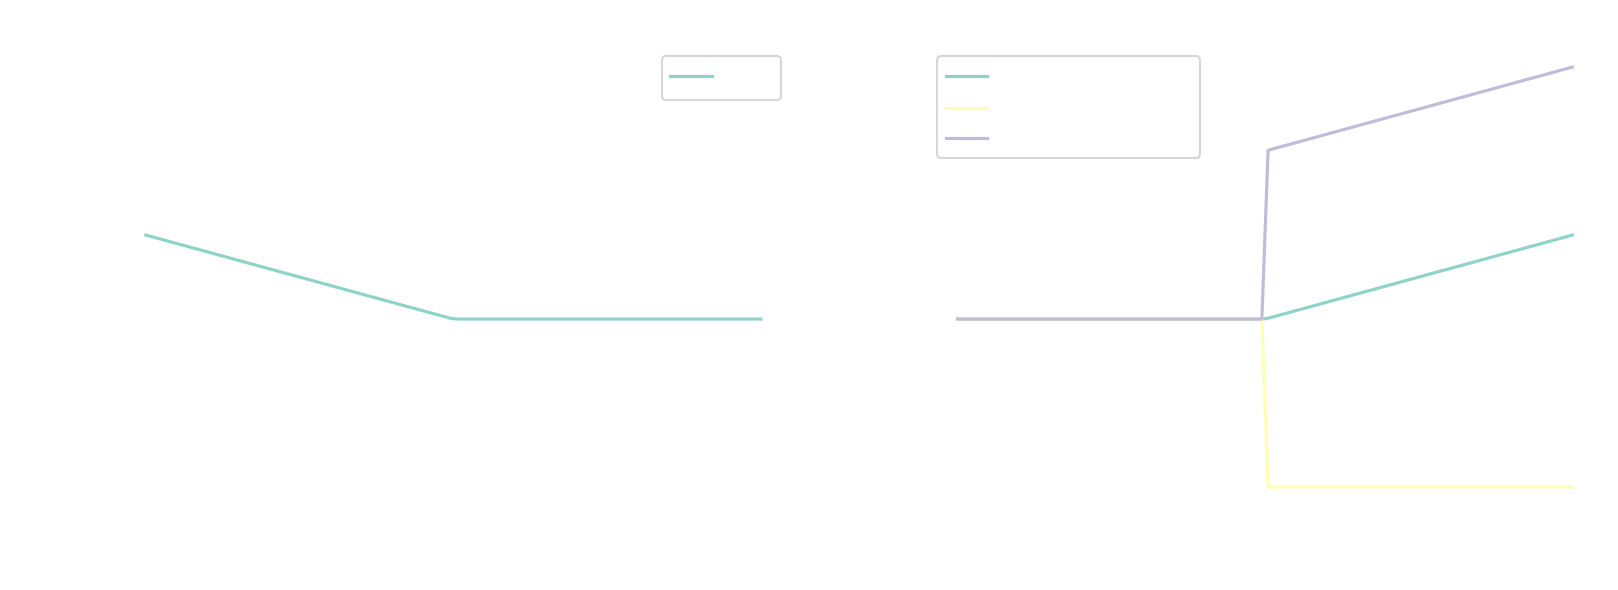

In [29]:
K = 100
x = np.linspace(50, 150, 100)
call_p = np.maximum(x - K, 0)
bin_call_p = np.where(x < K, 0, K)
put_p = np.maximum(K - x, 0)

fig, (ax_p, ax_c) = plt.subplots(ncols=2, figsize=(12.8, 4), dpi=150, sharey=True, sharex=True)
ax_p.plot(x,put_p, label="$f_p(s)$")
ax_p.set_xlabel("Stock price, $s$")
ax_p.set_ylabel("Option payoff")
ax_p.set_title("Put option")
ax_p.legend()

ax_c.plot(x, call_p, label="$f_c(s)$")
ax_c.plot(x, -bin_call_p, label="binary call")
ax_c.plot(x, call_p + bin_call_p, label="mysterious option")
ax_c.set_xlabel("Stock price, $s$")
ax_c.set_title("Call option")
ax_c.legend()

plt.show()

Let's derive the portfolio value containing an option, stock and bonds:

By Ito's formula:
\begin{multline}
d V(t,S_t) = V'_t(t, S_t) dt + V'_s(t, S_t) d S_t 
  + \frac12 V''_{ss}(t, S_t) (dS_t)^2 \\
= \biggl(V'_t(t, S_t) + \mu S_t V'_s(t, S_t) 
  + \frac{\sigma^2 S_t^2}{2} V''_{ss}(t, S_t)\biggr) dt 
  + \sigma S_t V'_s(t, S_t) d W_t.
\end{multline}

By the self-financing condition:
\begin{equation}
d V(t,S_t) = G_t d B_t + H_t d S_t 
= (rB_t G_t + \mu S_t H_t)dt + \sigma S_t H_t d W_t.
\end{equation}

Equating the coefficients of $dt$ and $dW_t$ we find

\begin{align*}
&(dW_t)& &H_t = V'_s(t,S_t)\\
&(dt)& &r B_t G_t + \mu S_t H_t = V'_t(t,S_t) + \mu S_t V'_s(t,S_t) 
  + \frac{\sigma^2 S_t^2}{2} V''_{ss}(t, S_t)
\end{align*}

Simplifying and using the terminal condition, we obtain the PDE
$$
\left\{
\begin{aligned}
&V'_t(t,s) + rs V'_s(t,s) + \frac{\sigma^2 s^2}{2} V''_{ss}(t,s) = r V(t,s),
\qquad t\in[0,T],\, s>0\\[0.5em]
&V(T,s) = f(s), \qquad s>0
\end{aligned}\right.
$$

**Important observation** The equation does not contain the drift coefficient $\mu$.

By applying the Feynmac-Kac formula we optain the closed-form solution:

$$
V(t,s) = \mathbb{E}_{t,s} e^{-r(T-t)}f(S'_T),
$$
where
$$
d S_t' = \color{red}{r}S_t' dt + \sigma S_t' d W_t.
$$

Solution for the call and put options:

$$
V^{\text{call}} = S\Phi(d_1) - e^{-rT}K\Phi(d_2), \quad
V^{\text{put}} = e^{-rT} K\Phi(-d_2) -S\Phi(-d_1),
$$
where $\Phi(x)$ is the standard normal distribution function, and
$$
d_1 = \frac{1}{\sigma\sqrt T} \biggl(\ln\frac{S}{K} 
  + \biggl(r+\frac{\sigma^2}{2}\biggr) T\biggr), \qquad 
d_2 = \frac{1}{\sigma\sqrt T} \biggl(\ln\frac{S}{K} 
  + \biggl(r-\frac{\sigma^2}{2}\biggr) T\biggr).
$$

**Note**: the option price is monotone as a function of $\sigma$.
We can invert the Black-Scholes formula to obtain
$$
\sigma^{IV} = V^{-1}(p),
$$
where $p$ is the observed market price.

## The greeks

Delta 
$$\Delta^{call} = \displaystyle \frac{\partial V^{call}}{\partial S} = \Phi(d_1)$$
$$\Delta^{put} = \displaystyle \frac{\partial V^{put}}{\partial S} = -\Phi(-d_1) = \Phi(d_1) - 1$$

Gamma
$$
\Gamma = \displaystyle\frac{\partial^{2} V}{\partial S^{2}} = \frac{\Phi'(d_1)}{S\sigma\sqrt{T - t}}
$$

Vega
$$
\mathcal{V} = \displaystyle \frac{\partial V}{\partial \sigma} = S \Phi'(d_1) \sqrt{T-t}
$$

Theta
$$
\theta^{call} = \displaystyle \frac{\partial V^{call}}{\partial t} = 
\frac{S \Phi'(d_1) \sigma}{2 \sqrt{T - t}} - rKe^{-r(T - t)}\Phi(d_2)
$$
$$
\theta^{put} = \displaystyle \frac{\partial V^{put}}{\partial t} =
\frac{S \Phi'(d_1) \sigma}{2 \sqrt{T - t}} + rKe^{-r(T - t)}\Phi(-d_2)
$$

Rho
$$
\rho^{call} = \displaystyle \frac{\partial V^{call}}{\partial r} = 
K(T - t)e^{-r(T - t)}\Phi( d_2)
$$
$$
\rho^{put} = \displaystyle \frac{\partial V^{put}}{\partial r} =
-K(T - t)e^{-r(T - t)}\Phi(-d_2)
$$

## Martingale methods